# Text-to-Speech Tacotron2

Tacotron2, Text to Melspectrogram.

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [malaya-speech/example/tts-tacotron2](https://github.com/huseinzol05/malaya-speech/tree/master/example/tts-tacotron2).
    
</div>

<div class="alert alert-warning">

This module is not language independent, so it not save to use on different languages. Pretrained models trained on hyperlocal languages.
    
</div>

<div class="alert alert-warning">

This is an application of malaya-speech Pipeline, read more about malaya-speech Pipeline at [malaya-speech/example/pipeline](https://github.com/huseinzol05/malaya-speech/tree/master/example/pipeline).
    
</div>

In [1]:
import malaya_speech
import numpy as np
from malaya_speech import Pipeline
import matplotlib.pyplot as plt
import IPython.display as ipd

### Tacotron2 description

1. Malaya-speech Tacotron2 will generate melspectrogram with feature size 80.
2. Use Malaya-speech vocoder to convert melspectrogram to waveform.

### List available Tacotron2

In [2]:
malaya_speech.tts.available_tacotron2()

INFO:root:`husein` combined loss from training set.


,Size (MB),Quantized Size (MB),Combined loss
male,104.0,26.3,0.1733
female,104.0,26.3,0.1733
husein,104.0,26.3,0.1165


`husein` voice contributed by [Husein-Zolkepli](https://www.linkedin.com/in/husein-zolkepli/).

**Outputs from quantized models not good as original models, so we are going to skip to load it**.

### Load Tacotron2 model

Tacotron2 use text normalizer from Malaya, https://malaya.readthedocs.io/en/latest/load-normalizer.html#Load-normalizer,

Make sure you install Malaya version > 4.0 to make it works,

```bash
pip install malaya -U
```

In [3]:
female = malaya_speech.tts.tacotron2(model = 'female')
male = malaya_speech.tts.tacotron2(model = 'male')
husein = malaya_speech.tts.tacotron2(model = 'husein')

In [4]:
# https://www.sinarharian.com.my/article/115216/BERITA/Politik/Syed-Saddiq-pertahan-Dr-Mahathir
string1 = 'Syed Saddiq berkata mereka seharusnya mengingati bahawa semasa menjadi Perdana Menteri Pakatan Harapan'

In [5]:
string2 = 'husein ketiak wangi dan comel dan kacak bergaya'

### Predict

```python
def predict(self, string):
    """
    Change string to Mel.

    Parameters
    ----------
    string: str

    Returns
    -------
    result: Dict[string, decoder-output, postnet-output, alignment]
    """
```

It only able to predict 1 text for single feed-forward.

In [18]:
r_female = female.predict(string1)

In [22]:
r_male = male.predict(string1)

In [10]:
r_husein = husein.predict(string1)

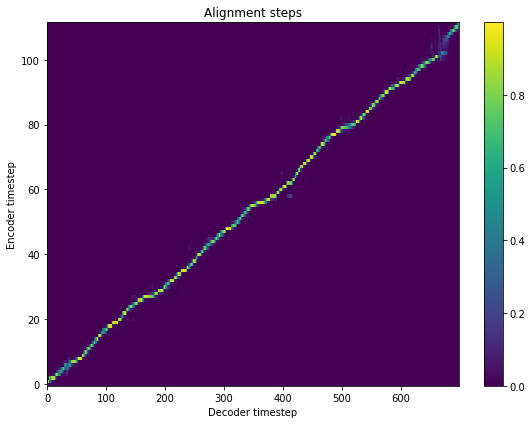

In [23]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111)
ax.set_title('Alignment steps')
im = ax.imshow(
    r_female['alignment'],
    aspect='auto',
    origin='lower',
    interpolation='none')
fig.colorbar(im, ax=ax)
xlabel = 'Decoder timestep'
plt.xlabel(xlabel)
plt.ylabel('Encoder timestep')
plt.tight_layout()
plt.show()

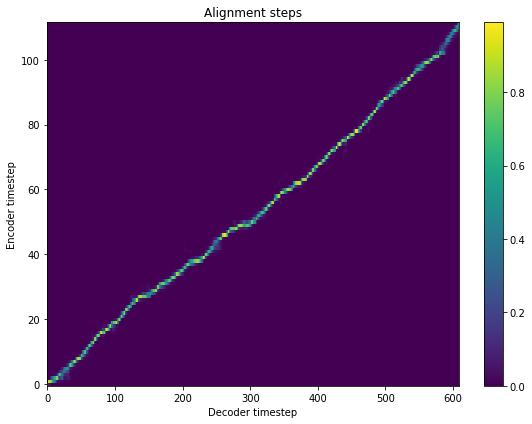

In [24]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111)
ax.set_title('Alignment steps')
im = ax.imshow(
    r_male['alignment'],
    aspect='auto',
    origin='lower',
    interpolation='none')
fig.colorbar(im, ax=ax)
xlabel = 'Decoder timestep'
plt.xlabel(xlabel)
plt.ylabel('Encoder timestep')
plt.tight_layout()
plt.show()

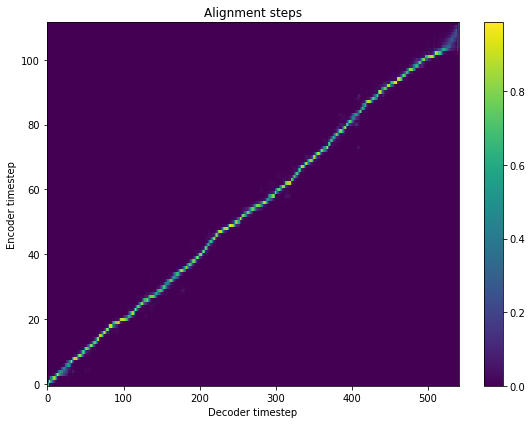

In [6]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111)
ax.set_title('Alignment steps')
im = ax.imshow(
    r_husein['alignment'],
    aspect='auto',
    origin='lower',
    interpolation='none')
fig.colorbar(im, ax=ax)
xlabel = 'Decoder timestep'
plt.xlabel(xlabel)
plt.ylabel('Encoder timestep')
plt.tight_layout()
plt.show()

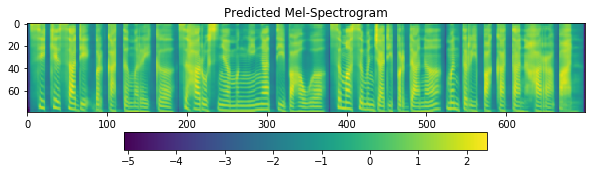

In [25]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(311)
ax1.set_title('Predicted Mel-Spectrogram')
im = ax1.imshow(np.rot90(r_female['postnet-output']), aspect='auto', interpolation='none')
fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=ax1)
plt.show()

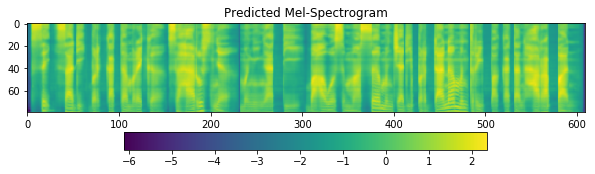

In [26]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(311)
ax1.set_title('Predicted Mel-Spectrogram')
im = ax1.imshow(np.rot90(r_male['postnet-output']), aspect='auto', interpolation='none')
fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=ax1)
plt.show()

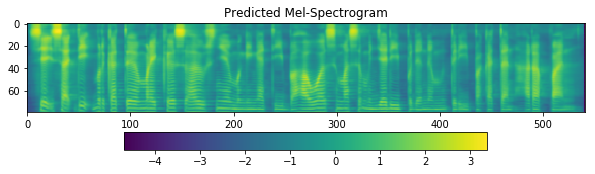

In [7]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(311)
ax1.set_title('Predicted Mel-Spectrogram')
im = ax1.imshow(np.rot90(r_husein['postnet-output']), aspect='auto', interpolation='none')
fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=ax1)
plt.show()

### Load Vocoder model

I will use MelGAN in this example. **But, make sure speakers are same. If use female tacotron2, need to use female MelGAN also**.

In [8]:
vocoder_female = malaya_speech.vocoder.melgan(model = 'female')
vocoder_male = malaya_speech.vocoder.melgan(model = 'male')
vocoder_husein = malaya_speech.vocoder.melgan(model = 'husein')

In [27]:
y_ = vocoder_female(r_female['postnet-output'])
ipd.Audio(y_, rate = 22050)

In [28]:
y_ = vocoder_male(r_male['postnet-output'])
ipd.Audio(y_, rate = 22050)

In [11]:
y_ = vocoder_husein(r_husein['postnet-output'])
ipd.Audio(y_, rate = 22050)

### Enhance using Speech Enhancement

Remove background screeching and signal noise.

In [15]:
enhancer = malaya_speech.speech_enhancement.deep_model(model = 'resnet-unet')

In [29]:
y_enhance = enhancer(malaya_speech.resample(y_, 22050, 44100))

In [30]:
ipd.Audio(y_enhance['voice'], rate = 44100)

### Combined everything using Pipeline

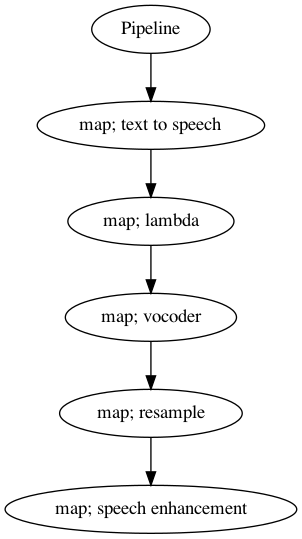

In [31]:
p = Pipeline()
pipeline = (
    p.map(male)
    .map(lambda x: x['postnet-output'])
    .map(vocoder_male)
    .map(malaya_speech.resample, old_samplerate = 22050, new_samplerate = 44100)
    .map(enhancer)
)
p.visualize()

In [36]:
r = p('husein wangi tetapi ketiak masam nasib baik kacak')

In [37]:
r['speech-enhancement']

{'voice': array([-0.00057033, -0.00097468, -0.0011151 , ..., -0.00075541,
        -0.00093485, -0.00079659], dtype=float32),
 'noise': array([ 2.2136733e-06, -1.5905292e-06,  9.7837983e-08, ...,
         1.9859881e-06, -3.9573997e-06, -2.1242506e-06], dtype=float32)}

In [38]:
ipd.Audio(r['speech-enhancement']['voice'], rate = 44100)